In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import scikit_posthocs as sp

%load_ext autoreload
%autoreload 2


share_file = 'ridesharing.csv'
hail_file = 'ridehailing.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df1 = pd.read_csv(share_file)

# read the second CSV file into a DataFrame
df2 = pd.read_csv(hail_file)

# concatenate the two DataFrames vertically
results_df = pd.concat([df1, df2], ignore_index=True)
results_df = results_df.dropna(subset="Steps") # drop passenger agents

In [3]:
steps = results_df[results_df["Step"] == 1440]
display(steps)

,RunId,iteration,Step,num_drivers,size,waiting_time,multi_pass,seed_int,rate,total_steps,strategy,Manhattan,AgentID,Steps,IdleTime,sec_id,request_time,pickup_time,dropoff_time,shortest distance
5139,3,0,1440,1,15,NaN,True,54,10,1440,StepType.CLOSEST,0,2,1344.0,20.0,NaN,NaN,NaN,NaN,NaN
10337,0,0,1440,1,15,NaN,True,11,10,1440,StepType.CLOSEST,0,2,1344.0,24.0,NaN,NaN,NaN,NaN,NaN
15648,1,0,1440,1,15,NaN,True,11,10,1440,StepType.WAITING,0,2,1336.0,39.0,NaN,NaN,NaN,NaN,NaN
20738,6,0,1440,1,15,NaN,True,111,10,1440,StepType.CLOSEST,0,2,1316.0,51.0,NaN,NaN,NaN,NaN,NaN
25957,4,0,1440,1,15,NaN,True,54,10,1440,StepType.WAITING,0,2,1335.0,31.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11537996,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,6,556.0,828.0,NaN,NaN,NaN,NaN,NaN
11537997,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,7,635.0,738.0,NaN,NaN,NaN,NaN,NaN
11537998,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,8,505.0,882.0,NaN,NaN,NaN,NaN,NaN
11537999,749,4,1440,5,15,NaN,False,578,10,1440,StepType.QUEUE,0,9,521.0,858.0,NaN,NaN,NaN,NaN,NaN


In [5]:
groups = steps.groupby(["num_drivers", "strategy", "AgentID", "multi_pass"])
steps_av = groups.mean()

agent_groups = steps_av.groupby(["num_drivers", "strategy", "multi_pass"])
total_sum = agent_groups.sum()
display(total_sum)

RunId  iteration    Step  size  \
num_drivers strategy         multi_pass                                    
1           StepType.CLOSEST False        313.5        2.0  1440.0  15.0   
                             True         313.5        2.0  1440.0  15.0   
            StepType.QUEUE   False        315.5        2.0  1440.0  15.0   
                             True         315.5        2.0  1440.0  15.0   
            StepType.WAITING False        314.5        2.0  1440.0  15.0   
                             True         314.5        2.0  1440.0  15.0   
2           StepType.CLOSEST False        687.0        4.0  2880.0  30.0   
                             True         687.0        4.0  2880.0  30.0   
            StepType.QUEUE   False        691.0        4.0  2880.0  30.0   
                             True         691.0        4.0  2880.0  30.0   
            StepType.WAITING False        689.0        4.0  2880.0  30.0   
                             True         689.0        4.0  2880.0  30.0   
3           StepType.CLOSEST False       1120.5        6.0  4320.0  45.0   
                             True        1120.5        6.0  4320.0  45.0   
            StepType.QUEUE   False       1126.5        6.0  4320.0  45.0   
                             True        1126.5        6.0  4320.0  45.0   
            StepType.WAITING False       1123.5        6.0  4320.0  45.0   
                             True        1123.5        6.0  4320.0  45.0   
4           StepType.CLOSEST False       1614.0        8.0  5760.0  60.0   
                             True        1614.0        8.0  5760.0  60.0   
            StepType.QUEUE   False       1622.0        8.0  5760.0  60.0   
                             True        1622.0        8.0  5760.0  60.0   
            StepType.WAITING False       1618.0        8.0  5760.0  60.0   
                             True        1618.0        8.0  5760.0  60.0   
5           StepType.CLOSEST False       2167.5       10.0  7200.0  75.0   
                             True        2167.5       10.0  7200.0  75.0   
            StepType.QUEUE   False       2177.5       10.0  7200.0  75.0   
                             True        2177.5       10.0  7200.0  75.0   
            StepType.WAITING False       2172.5       10.0  7200.0  75.0   
                             True        2172.5       10.0  7200.0  75.0   

                                         waiting_time  seed_int  rate  \
num_drivers strategy         multi_pass                                 
1           StepType.CLOSEST False                0.0     225.2  10.0   
                             True                 0.0     225.2  10.0   
            StepType.QUEUE   False                0.0     225.2  10.0   
                             True                 0.0     225.2  10.0   
            StepType.WAITING False                0.0     225.2  10.0   
                             True                 0.0     225.2  10.0   
2           StepType.CLOSEST False                0.0     450.4  20.0   
                             True                 0.0     450.4  20.0   
            StepType.QUEUE   False                0.0     450.4  20.0   
                             True                 0.0     450.4  20.0   
            StepType.WAITING False                0.0     450.4  20.0   
                             True                 0.0     450.4  20.0   
3           StepType.CLOSEST False                0.0     675.6  30.0   
                             True                 0.0     675.6  30.0   
            StepType.QUEUE   False                0.0     675.6  30.0   
                             True                 0.0     675.6  30.0   
            StepType.WAITING False                0.0     675.6  30.0   
                             True                 0.0     675.6  30.0   
4           StepType.CLOSEST False                0.0     900.8  40.0   
                             True                 0.0     900.8  40.0   
   

C:\Users\lokhe\AppData\Local\Temp\ipykernel_6692\280618005.py:5: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (n, type) in enumerate(groups):
C:\Users\lokhe\AppData\Local\Temp\ipykernel_6692\280618005.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in types:


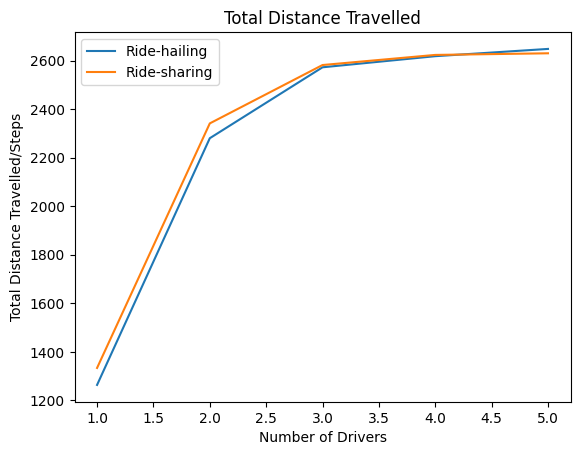

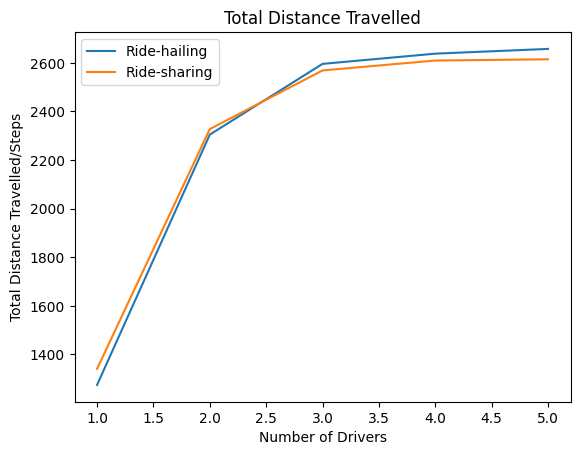

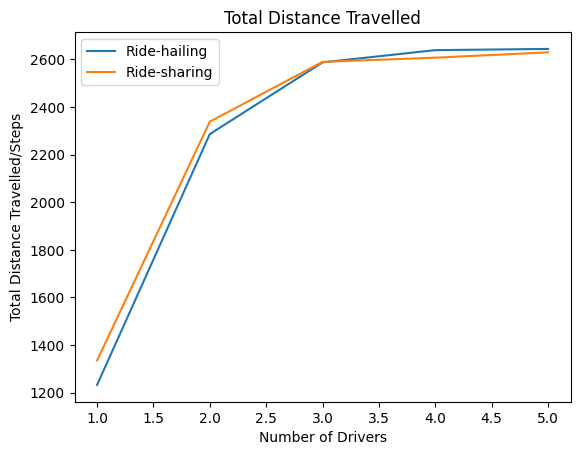

In [20]:


strats = ['Closest', 'Queue', 'Waiting']
files = ['Ride-hailing', 'Ride-sharing']
groups = (total_sum.groupby(['strategy']))

for i, (n, type) in enumerate(groups):
    fig, ax = plt.subplots()
    types = type.groupby(['multi_pass'])

    for name, group in types:
        ax.plot(group.index.get_level_values('num_drivers'), group['Steps'], label=name)
    
    ax.legend(files)
    ax.set_xlabel('Number of Drivers')
    ax.set_ylabel('Total Distance Travelled/Steps')
    ax.set_title('Total Distance Travelled')
    plt.savefig(f'figures/steps{strats[i]}.png')




## Stats Testing

In [26]:
norm = pd.DataFrame(columns=['Strategy', 'num_drivers', 'Iteration', 'Seed_int', 'steps', 'multi_pass'])

for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
    for i in range(1,6):
        for seed_int in steps['seed_int'].unique():
            for iteration in steps['iteration'].unique():
                for multi_pass in [True, False]:
                    distance = steps[(steps["strategy"] == strategy) & (steps["num_drivers"] == i) & (steps['seed_int'] == seed_int) & (steps['iteration'] == iteration) & steps['multi_pass'] == multi_pass]
                    total_steps = distance['Steps'].sum()
                    
                    norm.loc[len(norm)] = {'Strategy': strategy, 'num_drivers': i, 'Iteration': iteration, 'Seed_int': seed_int, 'steps': total_steps, 'multi_pass': multi_pass}

In [28]:

for i in range(1,6):
    for strat in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
        group1 = norm[(norm["Strategy"] == strat) & (norm["num_drivers"] == i) & norm["multi_pass"]== True]['steps']
        group2 = norm[(norm["Strategy"] == strat) & (norm["num_drivers"] == i) & norm["multi_pass"]== False]['steps']
    
        stat, p = mannwhitneyu(group1, group2, alternative='greater')

        print('Statistics=%.4f' % (p), i, strat)


Statistics=1.0000 1 StepType.CLOSEST
Statistics=1.0000 1 StepType.QUEUE
Statistics=1.0000 1 StepType.WAITING
Statistics=1.0000 2 StepType.CLOSEST
Statistics=1.0000 2 StepType.QUEUE
Statistics=1.0000 2 StepType.WAITING
Statistics=1.0000 3 StepType.CLOSEST
Statistics=1.0000 3 StepType.QUEUE
Statistics=1.0000 3 StepType.WAITING
Statistics=0.9995 4 StepType.CLOSEST
Statistics=0.9999 4 StepType.QUEUE
Statistics=0.9999 4 StepType.WAITING
Statistics=0.9993 5 StepType.CLOSEST
Statistics=0.9998 5 StepType.QUEUE
Statistics=0.9994 5 StepType.WAITING
